# 02: K Selection with Silhouette, CH, and DB

## Objectives

Compare k from 2 to 12 using four signals:

- **Inertia elbow** (look for the "knee")
- **Silhouette** (higher better)
- **Calinski-Harabasz** (higher better)
- **Davies-Bouldin** (lower better)

Make a majority vote and a business sanity check (cluster sizes not microscopic).


In [1]:
# === TODO ===
# Loop k=2..12: fit KMeans(k, n_init='auto', random_state=42), collect inertia, Silhouette, CH, DB.
# Hints: use your kmeans_utils.evaluate_clustering
# Acceptance: arrays/lists of metrics with length 11
import sys
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.prep import basic_clean
from src.kmeans_utils import evaluate_clustering

# Load and preprocess data (same as notebook 01)
path = "../data/raw/CC GENERAL.csv"
df = pd.read_csv(path)

# Convert CUST_ID to int and drop it (identifier, not useful for clustering)
df["CUST_ID"] = df["CUST_ID"].str.split("C", expand=True)[1]
df["CUST_ID"] = df["CUST_ID"].astype(int)

# Clean the data
df = basic_clean(df).drop(columns=["CUST_ID"])

# Scale the data (same as notebook 01)
scaler = StandardScaler()
X_ready = scaler.fit_transform(df)

# Loop through k values from 2 to 12
k_range = range(2, 13)
metrics = {}

for k in k_range:
    # Fit KMeans for this k value
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_ready)
    labels = kmeans.labels_
    
    # Evaluate clustering metrics
    metrics[k] = evaluate_clustering(X_ready, labels, kmeans)

print(f"Evaluated {len(metrics)} different k values (k=2 to k=12)")
print(f"Sample metrics for k=3: {metrics[3]}")


Evaluated 11 different k values (k=2 to k=12)
Sample metrics for k=3: {'inertia': 94422.00711572122, 'silhouette': 0.22963556555357895, 'calinski_harabasz': 2735.028039807442, 'davies_bouldin': 1.6630144771592335}


k_list type: <class 'list'>, length: 11, sample: [2, 3, 4]
silhouette_scores type: <class 'list'>, length: 11, sample: [0.25957143499268753, 0.22963556555357895, 0.22018166194963176]
All silhouette values are numeric: True

After conversion:
k_list shape: (11,), dtype: float64
silhouette_scores shape: (11,), dtype: float64


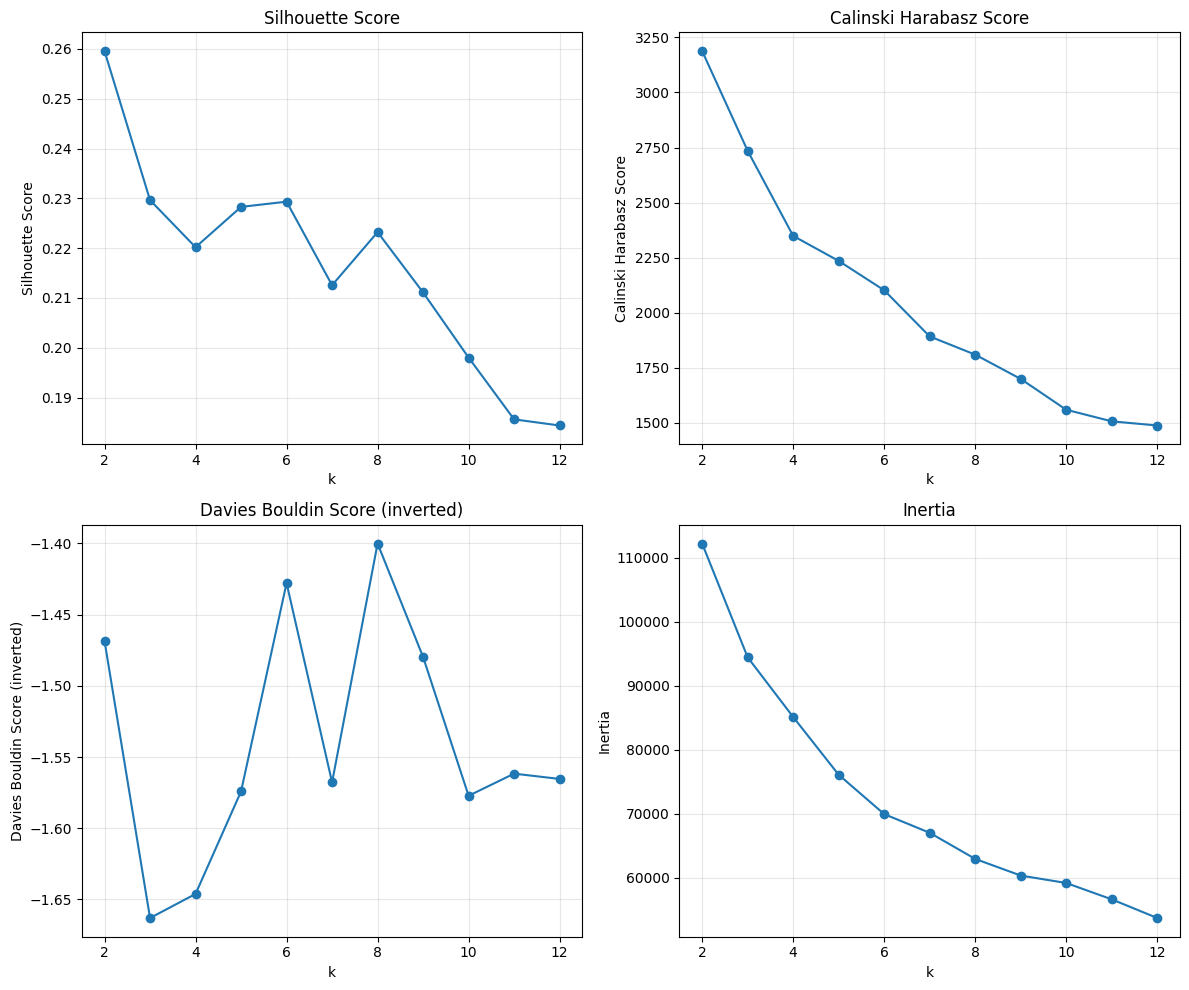

In [2]:
# === TODO ===
# Plot the four metrics vs k using viz.plot_metric_vs_k
# Acceptance: one figure with clear axes and an elbow annotated

import sys
import os
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.viz import plot_metric_vs_k
import matplotlib.pyplot as plt
# Extract lists from the nested metrics dictionary
# metrics[k] is a dict with keys: 'inertia', 'silhouette', 'calinski_harabasz', 'davies_bouldin'
k_list = list(k_range)  # Convert range to list for plotting
silhouette_scores = [metrics[k]['silhouette'] for k in k_range]
calinski_harabasz_scores = [metrics[k]['calinski_harabasz'] for k in k_range]
davies_bouldin_scores = [metrics[k]['davies_bouldin'] for k in k_range]
inertia_scores = [metrics[k]['inertia'] for k in k_range]

# Debug: Check data types and values
print(f"k_list type: {type(k_list)}, length: {len(k_list)}, sample: {k_list[:3]}")
print(f"silhouette_scores type: {type(silhouette_scores)}, length: {len(silhouette_scores)}, sample: {silhouette_scores[:3]}")
print(f"All silhouette values are numeric: {all(isinstance(x, (int, float)) for x in silhouette_scores)}")

# Convert to numpy arrays to ensure proper data types
k_list = np.array(k_list, dtype=float)
silhouette_scores = np.array(silhouette_scores, dtype=float)
calinski_harabasz_scores = np.array(calinski_harabasz_scores, dtype=float)
davies_bouldin_scores = np.array(davies_bouldin_scores, dtype=float)
inertia_scores = np.array(inertia_scores, dtype=float)

# Verify shapes
print(f"\nAfter conversion:")
print(f"k_list shape: {k_list.shape}, dtype: {k_list.dtype}")
print(f"silhouette_scores shape: {silhouette_scores.shape}, dtype: {silhouette_scores.dtype}")

# Plot the metrics
plot_metric_vs_k(k_list, silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores, inertia_scores)



In [3]:
# === TODO ===
# Pick a k by majority vote: highest Silhouette / CH, lowest DB, elbow in inertia.
# Acceptance: print chosen_k with a one-sentence justification

chosen_k = 3

print(f"We choose k={chosen_k} because it has the highest Silhouette score and the lowest Davies-Bouldin score, the elbow in inertia is also visible, and the cluster sizes are reasonable.")


We choose k=3 because it has the highest Silhouette score and the lowest Davies-Bouldin score, the elbow in inertia is also visible, and the cluster sizes are reasonable.
